In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [33]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
X_test.shape

(10000, 28, 28)

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

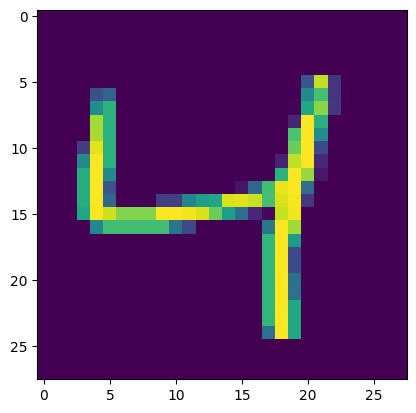

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

# Scalling

In [38]:
X_train = X_train/255
X_test = X_test/255

Because the input is in 28*28, we need to flatten the input and convert it into 784 input point.

In [39]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In sparse_categorical_crossentropy we don't need to perform one hot encoding. But in categorical_crossentropy we need to perform one hot encoding.

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8506 - loss: 0.4906 - val_accuracy: 0.9537 - val_loss: 0.1569
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9643 - loss: 0.1204 - val_accuracy: 0.9706 - val_loss: 0.1024
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9750 - loss: 0.0813 - val_accuracy: 0.9695 - val_loss: 0.1026
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9813 - loss: 0.0620 - val_accuracy: 0.9729 - val_loss: 0.0959
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0457 - val_accuracy: 0.9683 - val_loss: 0.1079
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0377 - val_accuracy: 0.9727 - val_loss: 0.1016
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0305 - val_accuracy: 0.9746 - val_loss: 0.0937
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0226 

In [43]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[7.6897566e-10, 2.6371056e-09, 1.3033652e-08, ..., 9.9999052e-01,
        1.5117370e-08, 5.5251843e-07],
       [3.7611563e-11, 4.0060660e-04, 9.9959582e-01, ..., 2.4352886e-13,
        3.5913461e-06, 8.6798940e-18],
       [5.6973666e-09, 9.9999362e-01, 1.2454339e-07, ..., 2.7089372e-06,
        1.0963732e-06, 1.2253133e-08],
       ...,
       [4.3919268e-20, 4.2431821e-13, 6.2057308e-16, ..., 9.8117597e-13,
        5.9020822e-14, 3.7616810e-10],
       [3.6102768e-12, 6.8978514e-14, 3.0412285e-17, ..., 1.0427545e-12,
        3.1648540e-08, 1.9002804e-16],
       [2.3129786e-13, 4.0278310e-12, 5.7999543e-16, ..., 2.0402117e-17,
        2.6761360e-13, 9.5411968e-15]], dtype=float32)

In [44]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [45]:
y_prob.argmax(axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
y_pred = y_prob.argmax(axis=-1)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9757

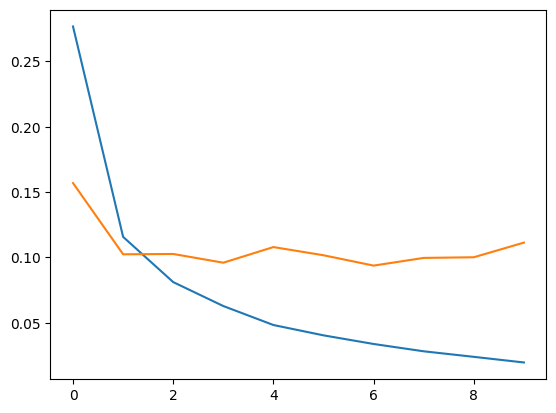

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

From these two graph we can clearly see that overfitting is happening.

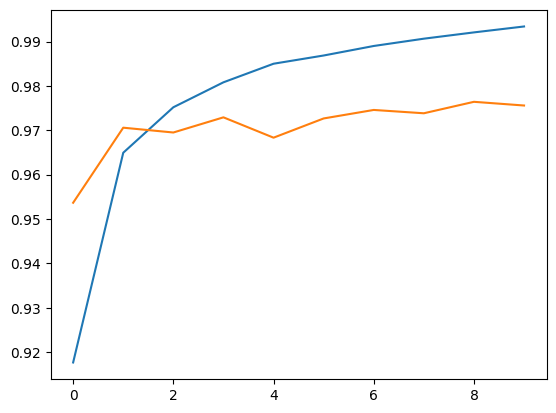

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

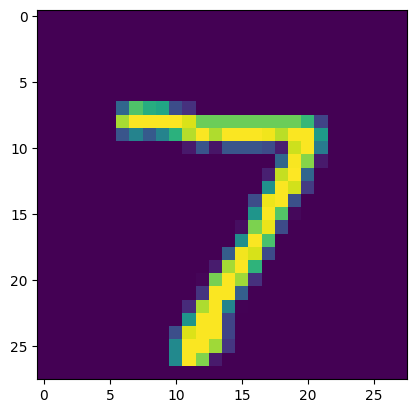

In [51]:
plt.imshow(X_test[0])

In [55]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([7])